In [1]:
import pandas as pd

## Data Collection & Preprocessing

### Data Collection and Key Purpose
Our key dataset is Divvy Bike Share Service data, from https://divvy-tripdata.s3.amazonaws.com/index.html. We selected data in year 2019, which consists of 4 csv files,from Q1 to Q4.

(Key Purpose to be filled up after machine learning part)

In [2]:
# Define the file paths for each quarter's data
file_paths = {
    'Q1': 'data/Divvy_Trips_2019_Q1.csv',
    'Q2': 'data/Divvy_Trips_2019_Q2.csv',
    'Q3': 'data/Divvy_Trips_2019_Q3.csv',
    'Q4': 'data/Divvy_Trips_2019_Q4.csv'
}

Check if the 4 files share identical column names in order to concatenate all quarters.

In [3]:
# Display the column names of each file to see the differences
for key, file_path in file_paths.items():
    df = pd.read_csv(file_path, nrows=1)  # Load just the first row for speed
    print(f"\nColumn names in {key}:")
    print(df.columns.tolist())



Column names in Q1:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q2:
['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time', '01 - Rental Details Local End Time', '01 - Rental Details Bike ID', '01 - Rental Details Duration In Seconds Uncapped', '03 - Rental Start Station ID', '03 - Rental Start Station Name', '02 - Rental End Station ID', '02 - Rental End Station Name', 'User Type', 'Member Gender', '05 - Member Details Member Birthday Year']

Column names in Q3:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q4:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthy

It is clear that from the previous output, Q2 has different column names. Thus, we need to convert them to the same naming convention.

In [4]:
# Define the correct column names for consistency
correct_columns = [
    'trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 
    'from_station_id', 'from_station_name', 'to_station_id', 
    'to_station_name', 'usertype', 'gender', 'birthyear'
]

# Load each CSV file, rename columns, and store in a list
dfs = []
for key, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    # Rename columns for Q2 as they do not match
    if key == 'Q2':
        df.columns = correct_columns
    dfs.append(df)

    # Display column names after renaming for verification
    print(f"\nColumn names in {key} after renaming:")
    print(df.columns.tolist())

# Concatenate all quarters into a single DataFrame
df_all_quarters = pd.concat(dfs, ignore_index=True)


Column names in Q1 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q2 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q3 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q4 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


### Data Preprocessing

**Step 1**

Convert the format of data.

In [5]:
# Convert 'start_time' and 'end_time' to datetime for easier manipulation
df_all_quarters['start_time'] = pd.to_datetime(df_all_quarters['start_time'], errors='coerce')
df_all_quarters['end_time'] = pd.to_datetime(df_all_quarters['end_time'], errors='coerce')

# Convert 'tripduration' to a numeric value (remove any commas and convert to float)
df_all_quarters['tripduration'] = pd.to_numeric(df_all_quarters['tripduration'].str.replace(',', ''), errors='coerce')

**Step 2**

Check missing values and replace them.

In [6]:
# Find the number of missing values in 'gender' and 'birthyear'
print("Missing values in 'start_time':", df_all_quarters['start_time'].isnull().sum())
print("Missing values in 'end_time':", df_all_quarters['end_time'].isnull().sum())
print("Missing values in 'tripduration':", df_all_quarters['tripduration'].isnull().sum())
print("Missing values in 'usertype':", df_all_quarters['usertype'].isnull().sum())
print("Missing values in 'gender':", df_all_quarters['gender'].isnull().sum())
print("Missing values in 'birthyear':", df_all_quarters['birthyear'].isnull().sum())

Missing values in 'start_time': 0
Missing values in 'end_time': 0
Missing values in 'tripduration': 0
Missing values in 'usertype': 0
Missing values in 'gender': 559206
Missing values in 'birthyear': 538751


In [7]:
# Replace missing values in 'gender' with "Unknown"
df_all_quarters['gender'].fillna('Unknown', inplace=True)

# Convert 'birthyear' to integers, filling missing values with a placeholder (e.g., 0 for unknown)
df_all_quarters['birthyear'] = df_all_quarters['birthyear'].fillna(0).astype(int)

# Check missing values in 'gender' after replacement
print("\nMissing values in 'gender' after replacement:", df_all_quarters['gender'].isnull().sum())

# Check missing values in 'birthyear' after replacement
print("\nMissing values in 'birthyear' after replacement:", df_all_quarters['birthyear'].isnull().sum())


Missing values in 'gender' after replacement: 0

Missing values in 'birthyear' after replacement: 0


**Step 3**

Check Duplicates.

In [8]:
# Check the number of duplicates
print("\nNumber of duplicate rows before removal:", df_all_quarters.duplicated().sum())

# Remove duplicates
df_all_quarters.drop_duplicates(inplace=True)

# Check the number of duplicates after removal
print("Number of duplicate rows after removal:", df_all_quarters.duplicated().sum())


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


**Step 4**

Feature Engineering

In [9]:
# Add a new column to categorize 'birthyear' into age groups
def categorize_birthyear(birthyear):
    if birthyear == 0:
        return "Unknown"
    elif birthyear < 1960:
        return "before 1960"
    elif 1960 <= birthyear < 1970:
        return "1960-1969"
    elif 1970 <= birthyear < 1980:
        return "1970-1979"
    elif 1980 <= birthyear < 1990:
        return "1980-1989"
    elif 1990 <= birthyear < 2000:
        return "1990-1999"
    else:
        return "after 1999"

df_all_quarters['age_group'] = df_all_quarters['birthyear'].apply(categorize_birthyear)

# Add columns for 'start_month' and 'start_day_of_week'
df_all_quarters['start_month'] = df_all_quarters['start_time'].dt.strftime('%b')  # Jan, Feb, ..., Dec
df_all_quarters['start_day_of_week'] = df_all_quarters['start_time'].dt.strftime('%a')  # Mon, Tue, ..., Sun


In [10]:
# Display a few rows to verify the changes
print("\nSample of processed data:")
print(df_all_quarters[['gender', 'birthyear', 'age_group', 'start_month', 'start_day_of_week']].head())


Sample of processed data:
   gender  birthyear  age_group start_month start_day_of_week
0    Male       1989  1980-1989         Jan               Tue
1  Female       1990  1990-1999         Jan               Tue
2  Female       1994  1990-1999         Jan               Tue
3    Male       1993  1990-1999         Jan               Tue
4    Male       1994  1990-1999         Jan               Tue


**Step 5**

Remove invalid trip durations and outliers using IQR method

In [11]:
# Step 1: Remove trip durations below 0 or above 24 hours (86,400 seconds)
invalid_trip_count = df_all_quarters[(df_all_quarters['tripduration'] < 0) | (df_all_quarters['tripduration'] > 86400)].shape[0]
print(f"Number of invalid trip durations (below 0 or above 24 hours): {invalid_trip_count}")

# Filter out the invalid trip durations
df_all_quarters = df_all_quarters[(df_all_quarters['tripduration'] >= 0) & (df_all_quarters['tripduration'] <= 86400)]

# Step 2: Remove outliers in 'tripduration' using the IQR method
Q1 = df_all_quarters['tripduration'].quantile(0.25)
Q3 = df_all_quarters['tripduration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = df_all_quarters[(df_all_quarters['tripduration'] < lower_bound) | (df_all_quarters['tripduration'] > upper_bound)].shape[0]
print(f"Number of outliers in 'tripduration': {outliers_count}")

# Filter out the outliers
df_all_quarters = df_all_quarters[(df_all_quarters['tripduration'] >= lower_bound) & (df_all_quarters['tripduration'] <= upper_bound)]

# Display the result after filtering
print("\nData after removing invalid trip durations and outliers:")
print(df_all_quarters[['tripduration']].describe().round(2))

Number of invalid trip durations (below 0 or above 24 hours): 1848
Number of outliers in 'tripduration': 266545

Data after removing invalid trip durations and outliers:
       tripduration
count    3549611.00
mean         817.31
std          549.43
min           61.00
25%          393.00
50%          659.00
75%         1115.00
max         2588.00


## Exploratory Data Analysis (EDA)

The goal of this section is to gain insight into the distribution, characteristics, and potential relationships of the dataset.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Make the dataframe name brief.
df = df_all_quarters

**Step 1**

Calculate the proportion of customers and subscribers.

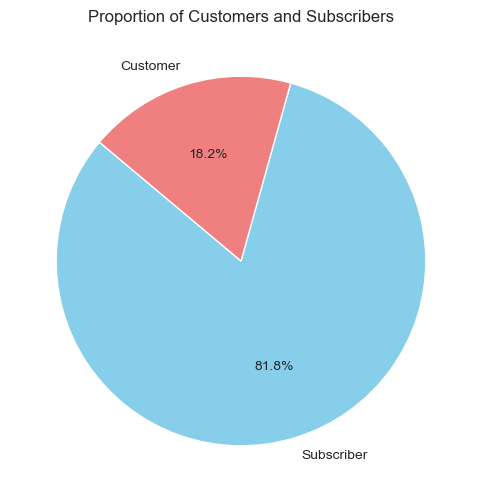

In [14]:
usertype_counts = df['usertype'].value_counts()

plt.figure(figsize=(6, 6))
usertype_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Customers and Subscribers')
plt.ylabel('')
plt.show()

**Step 2**

Calculate the average ride time for subscribers and customers.

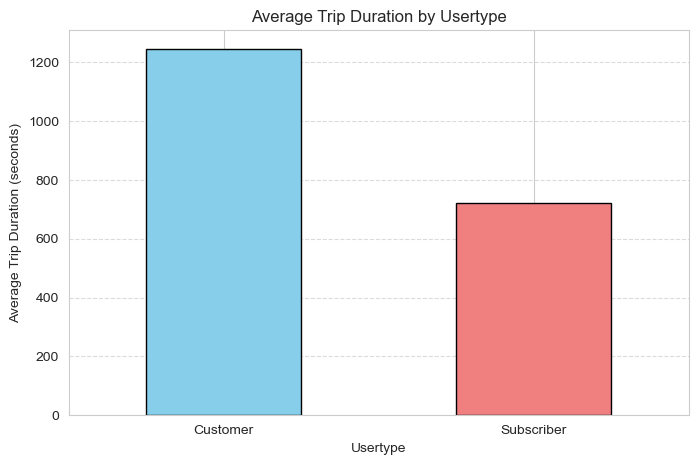

In [15]:
avg_trip_duration = df.groupby('usertype')['tripduration'].mean()

plt.figure(figsize=(8, 5))
avg_trip_duration.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Average Trip Duration by Usertype')
plt.xlabel('Usertype')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)  # 使x轴标签水平显示
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Step 3**

Calculate the male to female ratio of customers, subscribers and overall.

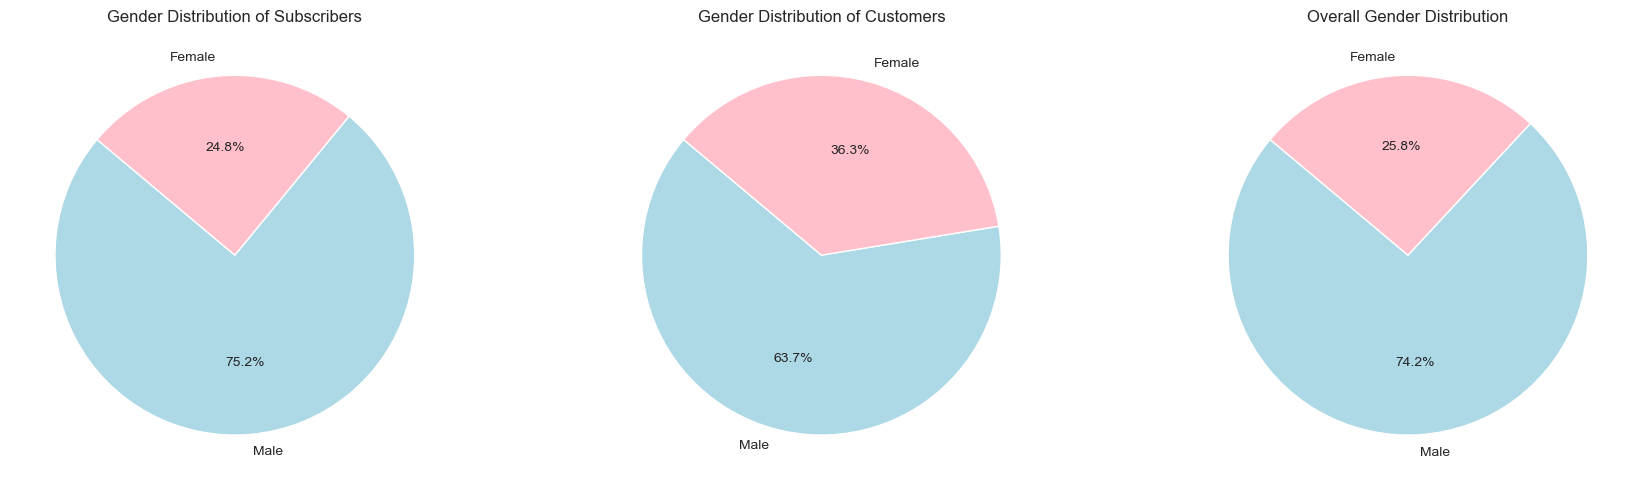

In [16]:
# Filter out unknown data in gender.
df_filtered = df[df['gender'] != 'Unknown']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = {'Male': 'lightblue', 'Female': 'pink'}

# 1. Calculate the male/female ratio of subscribers.
subscriber_gender_counts = df_filtered[df_filtered['usertype'] == 'Subscriber']['gender'].value_counts()
axes[0].pie(subscriber_gender_counts, 
            labels=subscriber_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in subscriber_gender_counts.index])
axes[0].set_title('Gender Distribution of Subscribers')

# 2. Calculate the male/female ratio of customers.
customer_gender_counts = df_filtered[df_filtered['usertype'] == 'Customer']['gender'].value_counts()
axes[1].pie(customer_gender_counts, 
            labels=customer_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in customer_gender_counts.index])
axes[1].set_title('Gender Distribution of Customers')

# 3. Calculate the overall male/female ratio.
overall_gender_counts = df_filtered['gender'].value_counts()
axes[2].pie(overall_gender_counts, 
            labels=overall_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in overall_gender_counts.index])
axes[2].set_title('Overall Gender Distribution')

plt.tight_layout()
plt.show()

**Step 4**

Calculate the average trip duration for different genders.

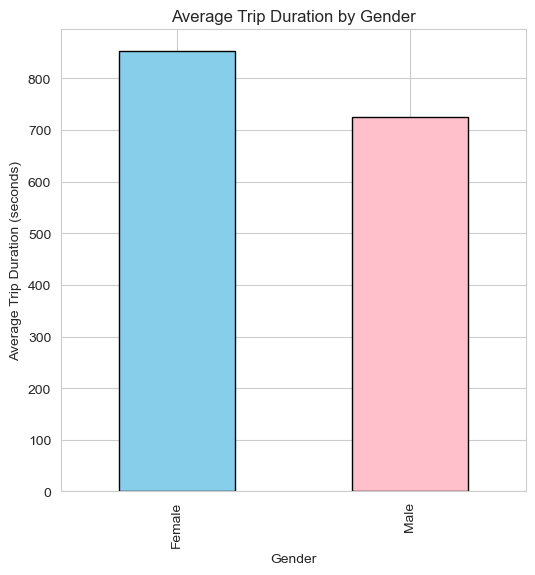

In [17]:
gender_avg_duration = df_filtered.groupby('gender')['tripduration'].mean()

plt.figure(figsize=(6, 6))
gender_avg_duration.plot(kind='bar', color=['skyblue', 'pink', 'gray'], edgecolor='black')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

**Step 5**

Calculate the age group distribution of customers, subscribers and overall.

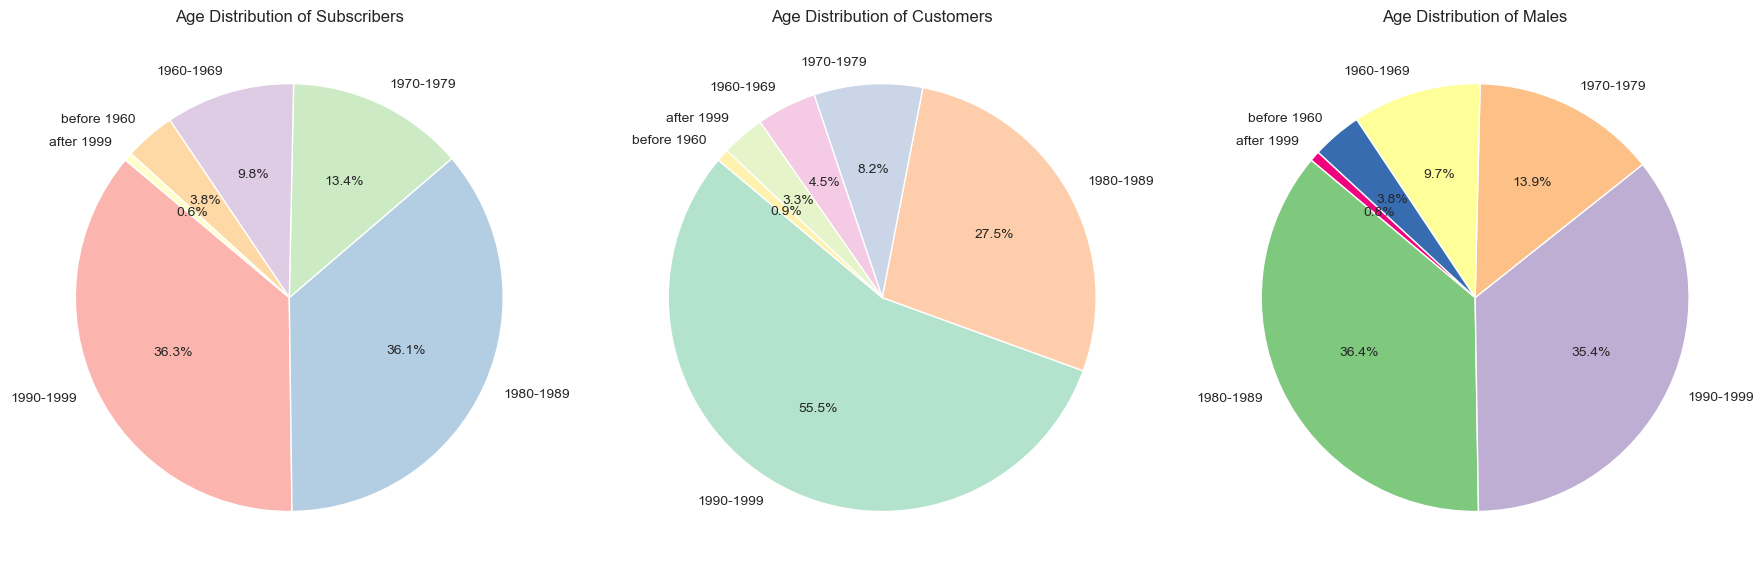

In [18]:
# Filter out unknown data in age_group.
df_filtered = df[df['age_group'] != 'Unknown']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Calculate the age ratio of all subscribers.
subscriber_age_counts = df_filtered[df_filtered['usertype'] == 'Subscriber']['age_group'].value_counts()
axes[0].pie(subscriber_age_counts, labels=subscriber_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
axes[0].set_title('Age Distribution of Subscribers')

# 2. Calculate the age ratio of all customers.
customer_age_counts = df_filtered[df_filtered['usertype'] == 'Customer']['age_group'].value_counts()
axes[1].pie(customer_age_counts, labels=customer_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
axes[1].set_title('Age Distribution of Customers')

# 3. Calculate the overall age ratio.
male_age_counts = df_filtered[df_filtered['gender'] == 'Male']['age_group'].value_counts()
axes[2].pie(male_age_counts, labels=male_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
axes[2].set_title('Age Distribution of Males')

plt.tight_layout()
plt.show()

**Step 6**

Calculate the average ride time for different age groups.

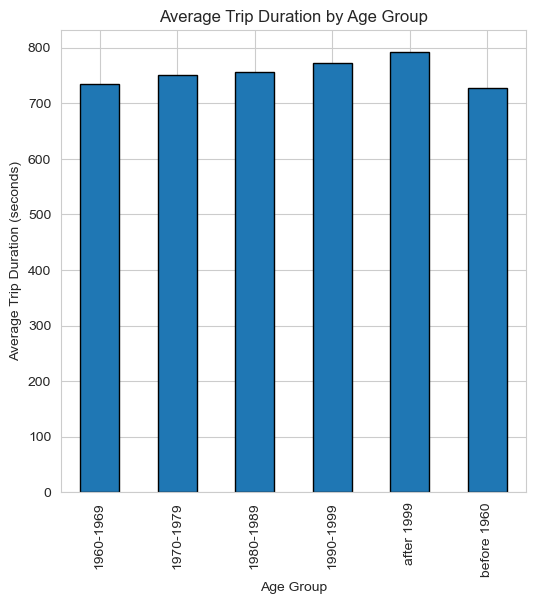

In [19]:
age_avg_duration = df_filtered.groupby('age_group')['tripduration'].mean()

plt.figure(figsize=(6, 6))
age_avg_duration.plot(kind='bar', edgecolor='black')
plt.title('Average Trip Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

**Step 7**

Calculate the average ride time for each month of the year and each day of the week.

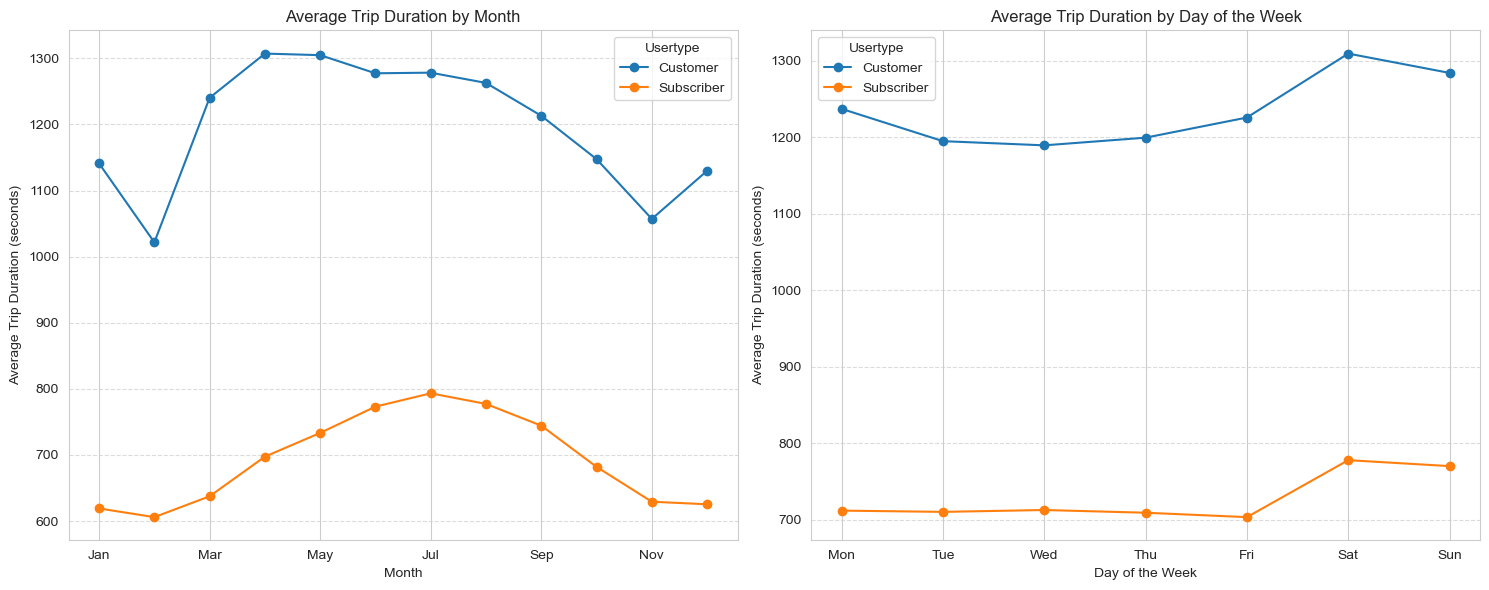

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. The average ride time for subscribers and customers on a monthly basis.
monthly_avg_trip = (df.groupby(['start_month', 'usertype'])['tripduration'].mean().unstack()
                    .reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

monthly_avg_trip.plot(ax=axes[0], marker='o')
axes[0].set_title('Average Trip Duration by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Trip Duration (seconds)')
axes[0].legend(title='Usertype')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. The average ride time for subscribers and customers on a weekly basis.
weekly_avg_trip = (df.groupby(['start_day_of_week', 'usertype'])['tripduration'].mean().unstack()
                   .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

weekly_avg_trip.plot(ax=axes[1], marker='o')
axes[1].set_title('Average Trip Duration by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Trip Duration (seconds)')
axes[1].legend(title='Usertype')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Step 8**

Calculate the ride numbers for each month of the year and each day of the week.

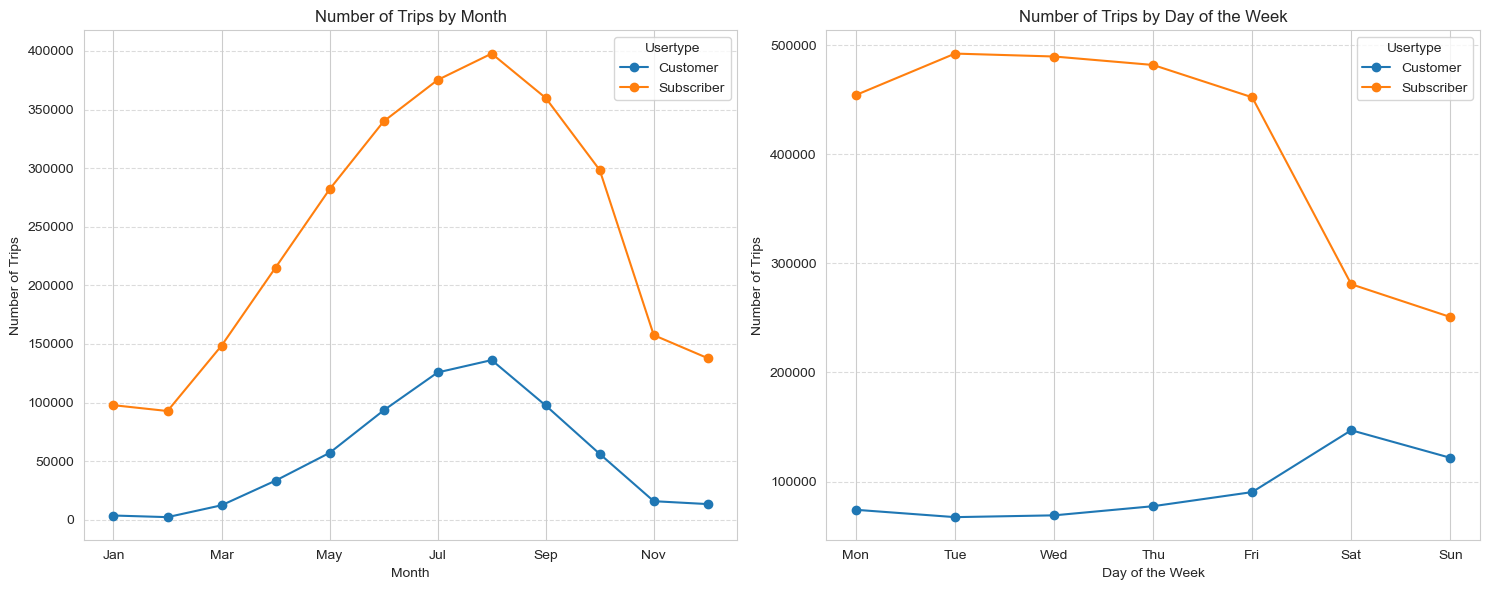

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. The ride numbers for subscribers and customers on a monthly basis.
monthly_trip_counts = (df.groupby(['start_month', 'usertype']).size().unstack()
                       .reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

monthly_trip_counts.plot(ax=axes[0], marker='o')
axes[0].set_title('Number of Trips by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Trips')
axes[0].legend(title='Usertype')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. The ride numbers for subscribers and customers on a weekly basis.
weekly_trip_counts = (df.groupby(['start_day_of_week', 'usertype']).size().unstack()
                      .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

weekly_trip_counts.plot(ax=axes[1], marker='o')
axes[1].set_title('Number of Trips by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Trips')
axes[1].legend(title='Usertype')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Step 9**

Draw heat map for the ride numbers versus month and day of the week.

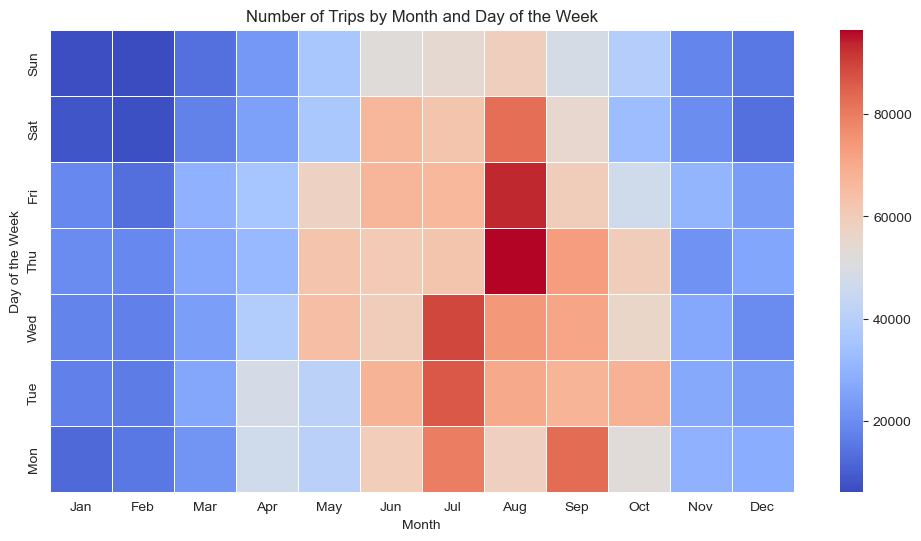

In [22]:
# Count the number of rides for each month and each day of the week.
pivot_table = df.pivot_table(index='start_day_of_week', columns='start_month', aggfunc='size', fill_value=0)

# Set thr sequence.
pivot_table = pivot_table.reindex(['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon'])
pivot_table = pivot_table[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=False, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Number of Trips by Month and Day of the Week')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

**Step 10**

Calculate the most popular departure and arrival stations for subscribers and customers.

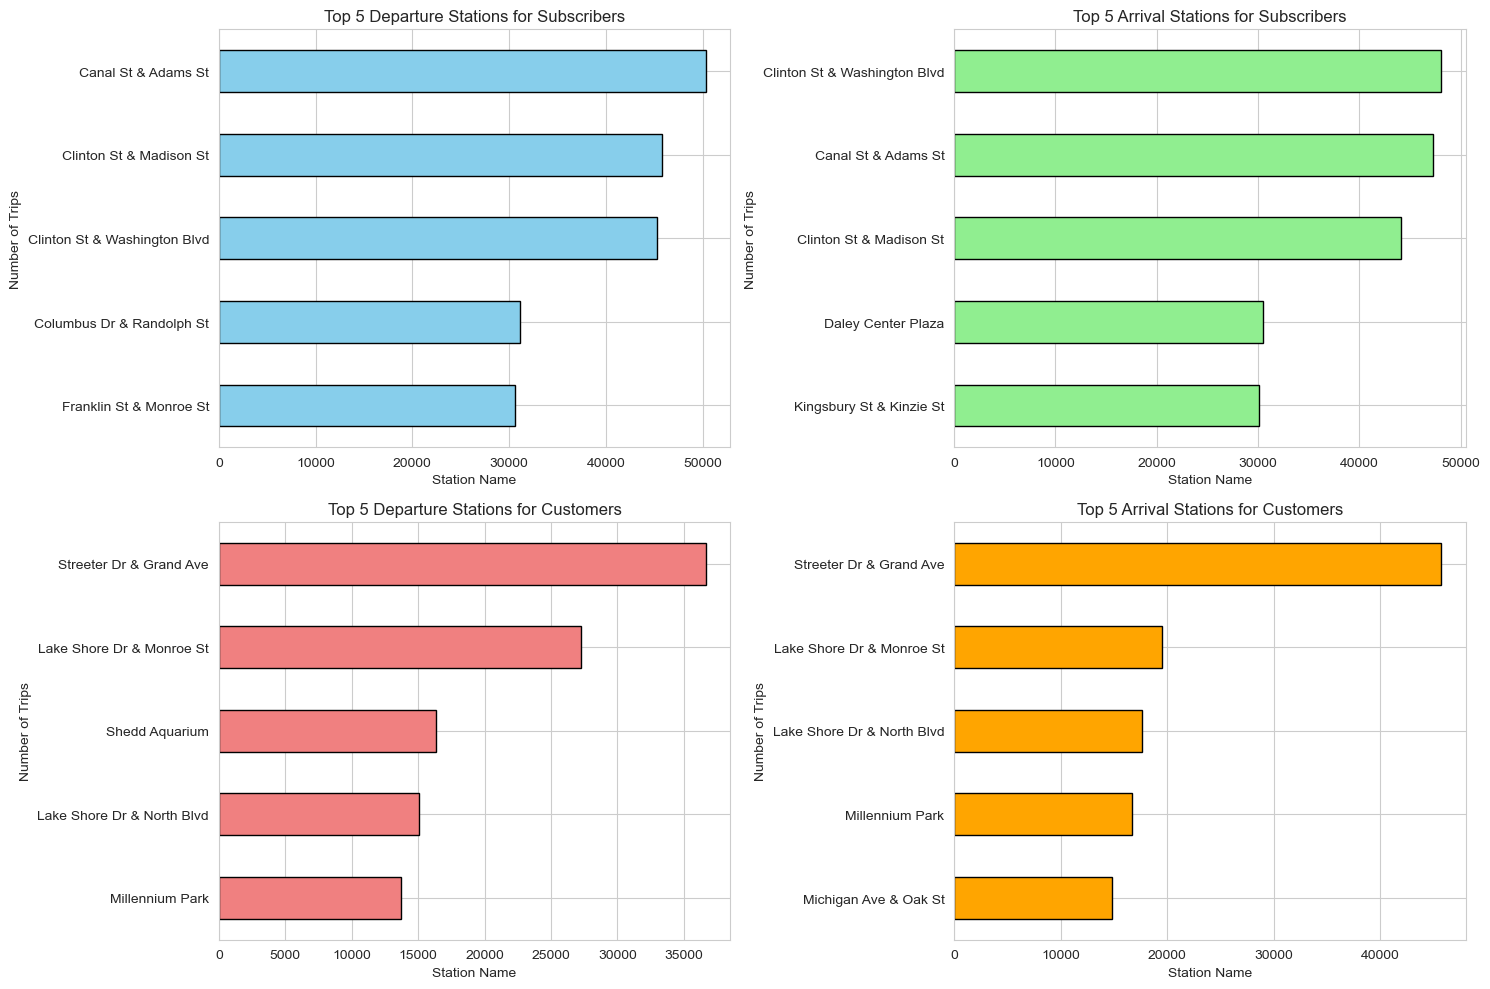

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. The most popular departure stations for subscribers.
top_from_stations_subscriber = df[df['usertype'] == 'Subscriber']['from_station_name'].value_counts().head(5).sort_values(ascending=True)
top_from_stations_subscriber.plot(kind='barh', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Top 5 Departure Stations for Subscribers')
axes[0, 0].set_xlabel('Station Name')
axes[0, 0].set_ylabel('Number of Trips')

# 2. The most popular arrival stations for subscribers.
top_to_stations_subscriber = df[df['usertype'] == 'Subscriber']['to_station_name'].value_counts().head(5).sort_values(ascending=True)
top_to_stations_subscriber.plot(kind='barh', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Top 5 Arrival Stations for Subscribers')
axes[0, 1].set_xlabel('Station Name')
axes[0, 1].set_ylabel('Number of Trips')

# 3. The most popular departure stations for customers.
top_from_stations_customer = df[df['usertype'] == 'Customer']['from_station_name'].value_counts().head(5).sort_values(ascending=True)
top_from_stations_customer.plot(kind='barh', ax=axes[1, 0], color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Top 5 Departure Stations for Customers')
axes[1, 0].set_xlabel('Station Name')
axes[1, 0].set_ylabel('Number of Trips')

# 4. The most popular arrival stations for customers.
top_to_stations_customer = df[df['usertype'] == 'Customer']['to_station_name'].value_counts().head(5).sort_values(ascending=True)
top_to_stations_customer.plot(kind='barh', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_title('Top 5 Arrival Stations for Customers')
axes[1, 1].set_xlabel('Station Name')
axes[1, 1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

## Further Exploration

**Step 1**

Sort the stations in descending order by number of departures.

In [24]:
station_trips = df.groupby('from_station_id').size()

# Sorting to show the sites with the highest number of car rentals
sorted_station_trips = station_trips.sort_values(ascending=False)

print(sorted_station_trips)

from_station_id
192    53562
35     50908
77     49097
91     47658
76     37190
       ...  
665        3
361        3
562        2
669        1
1          1
Length: 616, dtype: int64


**Step 2**

Sort the stations in descending order by number of arrival.

In [27]:
import pandas as pd


station_trips = df.groupby('to_station_id').size()

# Sorting to show the sites with the highest number of car rentals
sorted_station_trips = station_trips.sort_values(ascending=False)

print(sorted_station_trips)

to_station_id
35     59223
91     50362
192    49675
77     46736
43     36561
       ...  
562        3
361        3
363        2
669        1
1          1
Length: 617, dtype: int64


**Step 3**

Calculate net demand per station per hour (departure number - arrival number).

In [28]:
# Get date and hour information
df['date'] = pd.to_datetime(df['start_time'].dt.date)
df['hour'] = df['start_time'].dt.hour

# Calculate the number of car rentals per site
checkout_counts = df.groupby(['from_station_id', 'date', 'hour']).size().reset_index(name='checkouts')
checkout_counts.rename(columns={'from_station_id': 'station_id'}, inplace=True)

# Calculate the number of return trips per site
checkin_counts = df.groupby(['to_station_id', 'date', 'hour']).size().reset_index(name='checkins')
checkin_counts.rename(columns={'to_station_id': 'station_id'}, inplace=True)

# Consolidation of data
demand_data = pd.merge(checkout_counts, checkin_counts, on=['station_id', 'date', 'hour'], how='outer')

demand_data['checkouts'] = pd.to_numeric(demand_data['checkouts'], errors='coerce')
demand_data['checkins'] = pd.to_numeric(demand_data['checkins'], errors='coerce')
demand_data.fillna(0, inplace=True)

# Calculation of net requirements
demand_data['net_demand'] = demand_data['checkouts'] - demand_data['checkins']

demand_data.sort_values(by=['station_id', 'date', 'hour'], inplace=True)
print(demand_data)

         station_id       date  hour  checkouts  checkins  net_demand
0                 1 2019-05-21    14        1.0       1.0         0.0
1                 2 2019-01-01    20        1.0       1.0         0.0
1297243           2 2019-01-03     9        0.0       1.0        -1.0
2                 2 2019-01-03    15        2.0       5.0        -3.0
3                 2 2019-01-04    11        1.0       1.0         0.0
...             ...        ...   ...        ...       ...         ...
1789887         673 2019-12-30    23        0.0       1.0        -1.0
1297240         673 2019-12-31    10        1.0       0.0         1.0
1297241         673 2019-12-31    12        1.0       0.0         1.0
1789888         673 2019-12-31    16        0.0       2.0        -2.0
1297242         673 2019-12-31    17        1.0       0.0         1.0

[1789889 rows x 6 columns]


In [29]:
df_192 = demand_data[demand_data['station_id'] == 192]

**Step 4**

Using Random Forest Model to predict the net demand of 192 stations with the data of checkin and checkout bikes.

MSE: 0.48592254733218565


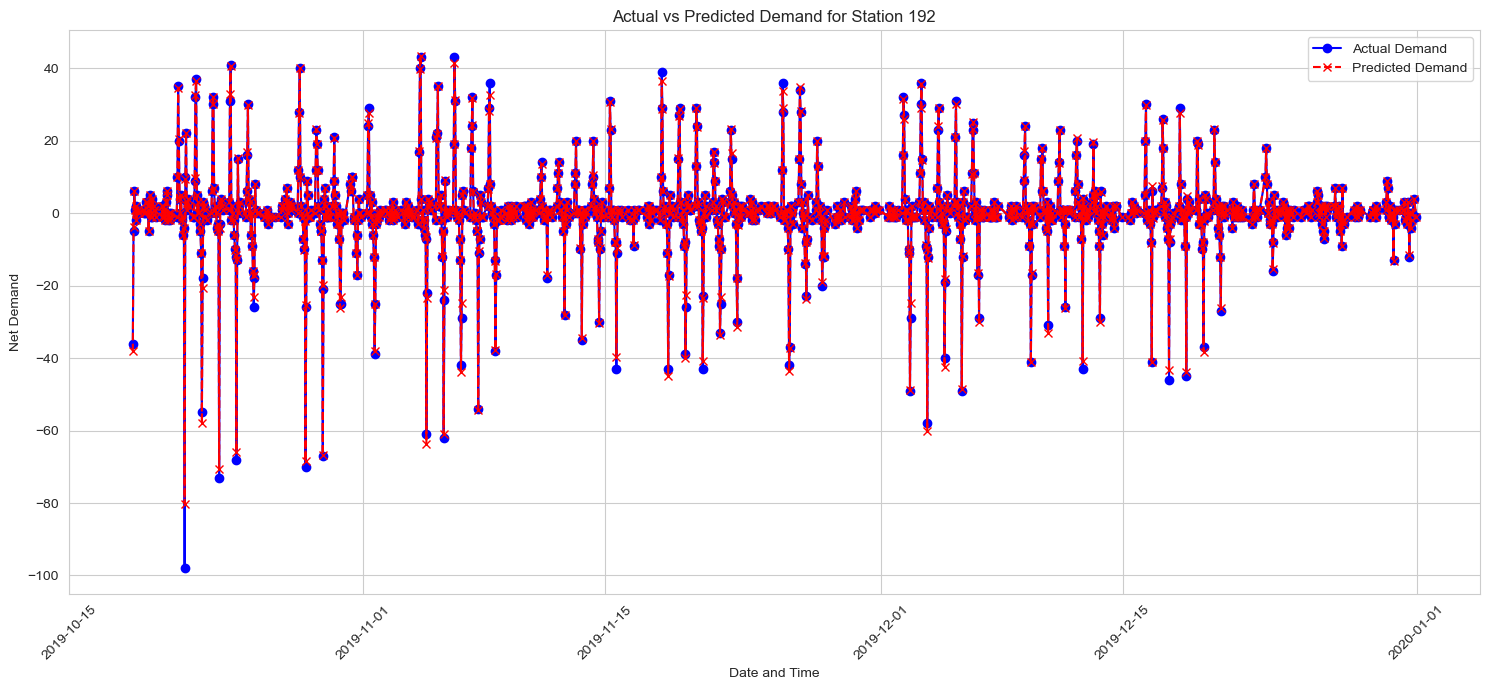

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Filtering data from site 192

df_192.set_index(pd.to_datetime(df_192['date'].astype(str) + ' ' + df_192['hour'].astype(str) + ':00'), inplace=True)

# Extraction of features and target variables
X = df_192[['checkins','checkouts']]  
y = df_192['net_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecast of hourly requirements for the next 7 days
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual Demand', color='blue', marker='o')
plt.plot(y_test.index, predictions, label='Predicted Demand', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Demand for Station 192')
plt.xlabel('Date and Time')
plt.ylabel('Net Demand')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Step 5**

Using LSTM Model to predict the net demand of 192 stations with the data of checkin and checkout and their time in format of hour.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = df_192[['hour', 'checkouts', 'checkins', 'net_demand']]
dates = df_192.index
data['sin_hour'] = np.sin(2 * np.pi * data['hour'] / 24)
data['cos_hour'] = np.cos(2 * np.pi * data['hour'] / 24)

# Normalising checkouts and checkins
scaler = MinMaxScaler(feature_range=(0, 1))
data[['checkouts', 'checkins']] = scaler.fit_transform(data[['checkouts', 'checkins']])

# Features and labelling
X = data[['sin_hour', 'cos_hour', 'checkouts', 'checkins']].values
y = data['net_demand'].values

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Constructing the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)

predictions = model.predict(X_test)

# assessment model
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

plt.figure(figsize=(10, 5))
plt.plot(dates_test, y_test, label='Actual Net Demand', color='blue', marker='o')
plt.plot(dates_test, predictions[:, 0], label='Predicted Net Demand', color='red', linestyle='--')
plt.title('Actual vs Predicted Net Demand')
plt.xlabel('Date and Time')
plt.ylabel('Net Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Step 6**

Based on the LSMTM model, the time series model is implemented and evaluated for the requirements of shared bicycle stations

In [185]:
df1 = demand_data.copy()

In [186]:
df1['hour'] = df1['hour'].astype(str).str.zfill(2)  # Convert hours to two-digit strings
df1['date'] = df1['date'].apply(lambda d: d.strftime('%Y-%m-%d'))


In [31]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Reshape,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


df1['datetime'] = pd.to_datetime(df1['date'] + ' ' + df1['hour'].astype(str) + ':00:00')
df1['day_of_week'] = df1['datetime'].dt.dayofweek
df1['hour_of_day'] = df1['datetime'].dt.hour

# Index coding of station_id
station_ids = {id: idx for idx, id in enumerate(df1['station_id'].unique())}
df1['station_id_encoded'] = df1['station_id'].apply(lambda x: station_ids[x])
# Data normalisation

scaler = MinMaxScaler(feature_range=(0, 1))
df1[['checkouts', 'checkins', 'net_demand']] = scaler.fit_transform(df1[['checkouts', 'checkins', 'net_demand']])

# Create Dataset Functions
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# feature selection
feature_columns = ['station_id_encoded', 'day_of_week', 'hour_of_day', 'checkouts', 'checkins']
X = df1[feature_columns]
y = df1['net_demand']

# Creating Time Series Data Sets
time_steps = 3
X, y = create_dataset(X, y, time_steps)

# Divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, len(feature_columns))),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

predictions = model.predict(X_test)


# Calculate the mean square error
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)



ModuleNotFoundError: No module named 'tensorflow'

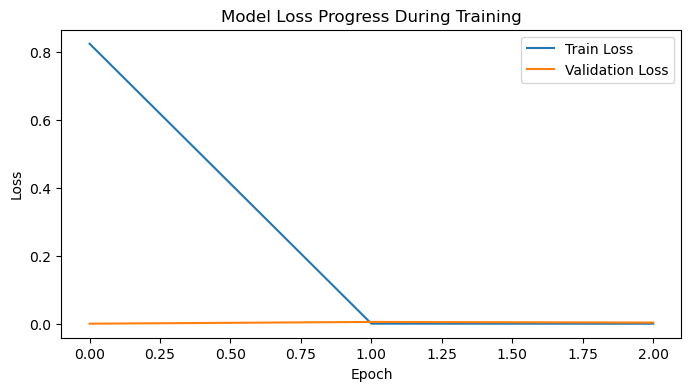

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


**Step 7**

A model built prior to the input of data for three consecutive points in time at a site predicts the demand for the next point in time.

In [189]:
import numpy as np

# Enter three consecutive time steps of data
input_data = np.array([
    [77, 1, 7, 0, 0],  # 
    [77, 1, 8, 0, 2], # 
    [77, 1, 9, 0, 1] # 
]).reshape((1, 3, 5))  

# Prediction using models for next timestamp
prediction = model.predict(input_data)
prediction 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.12657896]], dtype=float32)

**Step 8**

Cluster analysis of users by length of use, membership or not, and using time in a day.

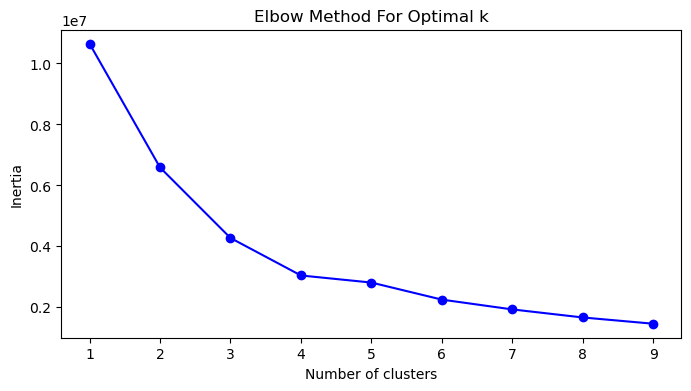

Cluster Summary:
          tripduration  usertype_encoded       hour
cluster                                           
0         1587.499663          1.000000  14.926392
1          532.406832          1.000000  17.066968
2          563.844863          0.994647   8.215253
3         1253.229488          0.000000  14.752865


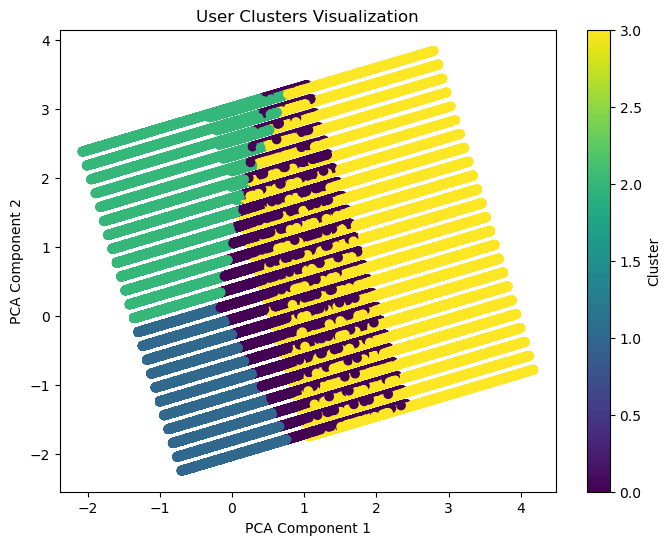

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df['age'] = 2023 - df['birthyear']

# Extract the number of hours and days of the week for travelling
df['hour'] = pd.to_datetime(df['start_time']).dt.hour
df['day_of_week'] = pd.to_datetime(df['start_time']).dt.dayofweek
# Encoding of usertype
df['usertype_encoded'] = df['usertype'].apply(lambda x: 1 if x == 'Subscriber' else 0)
# Selection of clustering features
selected_features = df[['tripduration', 'usertype_encoded', 'hour']]

# Removing Missing Values
selected_features = selected_features.dropna()

# Feature standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

# Determining the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Drawing the elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#  Elbow = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analysis of clustering results
# View the average characteristics of each cluster
numeric_columns = ['tripduration', 'usertype_encoded', 'hour']
cluster_summary = df.groupby('cluster')[numeric_columns].mean()
print("Cluster Summary:\n", cluster_summary)

# Dimensionality reduction and visualisation of clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('User Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [112]:
print(df.dtypes)

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                float64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                     int64
age_group                    object
start_month                  object
start_day_of_week            object
start_hour                    int32
end_hour                      int32
weekday                       int32
age                           int64
hour                          int32
day_of_week                   int32
usertype_encoded              int64
cluster                       int32
dtype: object


**Step 9**

Detailed cluster analysis of sites according to different characteristics

In [192]:
df2 = demand_data.copy()

In [193]:
import pandas as pd

df2['date'] = pd.to_datetime(df2['date'])

# Extract quarterly information
df2['quarter'] = df2['date'].dt.quarter

In [244]:
# Aggregate data by site and quarter
quarterly_data = df2.groupby(['station_id', 'quarter']).agg({
    'checkouts': 'sum',
    'checkins': 'sum',
    'net_demand': 'sum'
}).reset_index()

In [245]:
quarterly_data

,station_id,quarter,checkouts,checkins,net_demand
0,1,2,1.0,1.0,0.0
1,2,1,267.0,214.0,53.0
2,2,2,3122.0,2610.0,512.0
3,2,3,4093.0,3233.0,860.0
4,2,4,1117.0,814.0,303.0
...,...,...,...,...,...
2430,671,4,7.0,10.0,-3.0
2431,672,3,1671.0,1665.0,6.0
2432,672,4,2045.0,2043.0,2.0
2433,673,3,1608.0,1535.0,73.0


In [281]:
seasonal = quarterly_data.copy()

**Step 10** 

Plotting a rolling forecast of quarterly net demand for each site

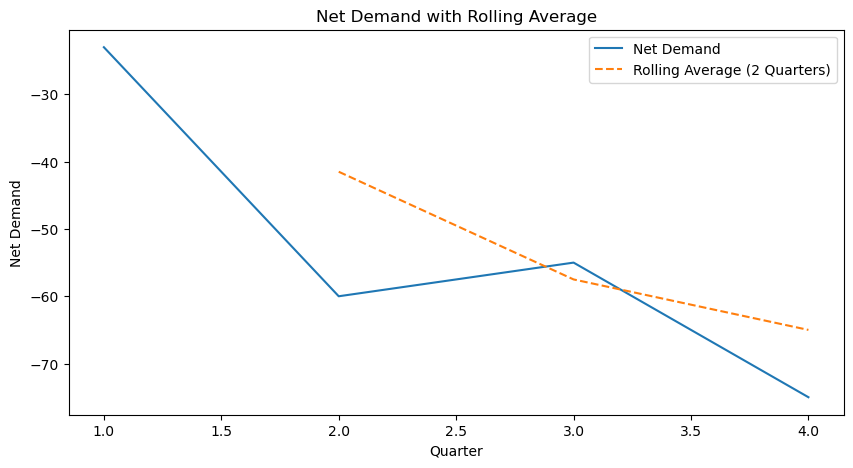

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
station_id = 55  # Change here to the id of the site you want to view
station_data = seasonal[seasonal['station_id'] == station_id].copy()
# 
station_data.set_index('quarter', inplace=True)
station_data['net_demand_rolling'] = station_data['net_demand'].rolling(window=2, center=True).mean()

# Plotting raw data and rolling averages
plt.figure(figsize=(10, 5))
plt.plot(station_data['net_demand'], label='Net Demand')
plt.plot(station_data['net_demand_rolling'], label='Rolling Average (2 Quarters)', linestyle='--')
plt.title('Net Demand with Rolling Average')
plt.xlabel('Quarter')
plt.ylabel('Net Demand')
plt.legend()
plt.show()

In [235]:
from sklearn.preprocessing import StandardScaler

# Features to be standardised
features1 = ['checkouts']
features2 = [ 'checkins'] 
features3 = [ 'net_demand']

**Step 11** 

Categorised by the number of vehicles entering the site

In [253]:
checkins = quarterly_data.copy()
scaler = StandardScaler()
checkins[features2] = scaler.fit_transform(checkins[features2])

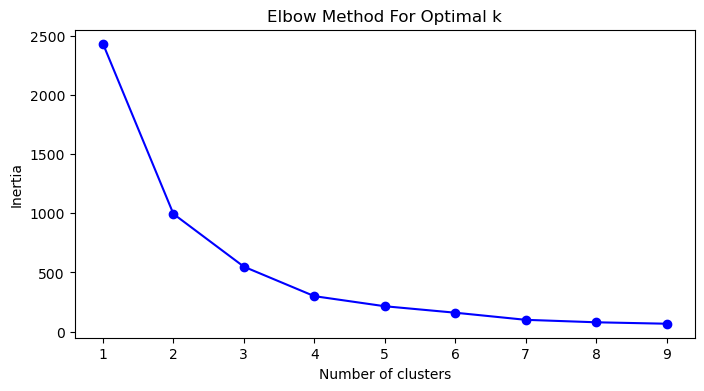

In [255]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(checkins[features2])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
checkins['cluster'] = kmeans.fit_predict(checkins[features2])

In [260]:

cluster_summary = checkins.groupby('cluster')['checkins'].mean()
print("Cluster Summary:\n", cluster_summary)


for i in range(4):  
    cluster_stations = checkins[checkins['cluster'] == i]
    print(f"\nCluster {i} stations:\n", cluster_stations['station_id'].unique())

Cluster Summary:
 cluster
0   -0.460767
1    2.248207
2    6.623938
3    0.539017
Name: checkins, dtype: float64

Cluster 0 stations:
 [  1   2   3   4   5   6   7   9  11  12  13  14  15  16  17  19  20  21
  22  23  25  27  28  29  30  32  33  34  39  40  41  42  45  46  54  55
  57  60  61  62  68  72  73  75  76  80  85  86  87  88  89  92  93  94
  95  96  97  99 101 102 103 106 108 109 111 112 113 114 115 116 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138
 141 143 144 145 146 147 148 149 150 152 153 154 156 157 158 159 160 161
 162 163 165 166 167 168 169 170 171 172 173 175 177 178 179 180 182 183
 184 185 186 188 190 193 194 196 197 200 201 202 203 204 205 206 207 208
 209 213 214 215 216 217 218 219 220 222 223 224 225 226 227 228 229 230
 231 232 233 234 236 237 238 239 240 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 267 268 270
 271 272 273 274 275 276 277 278 279 280 281 282 284 285 288 2

**Step 12**

Classification by number of trips from the station

In [261]:
checkouts = quarterly_data.copy()
scaler = StandardScaler()
checkouts[features1] = scaler.fit_transform(checkouts[features1])

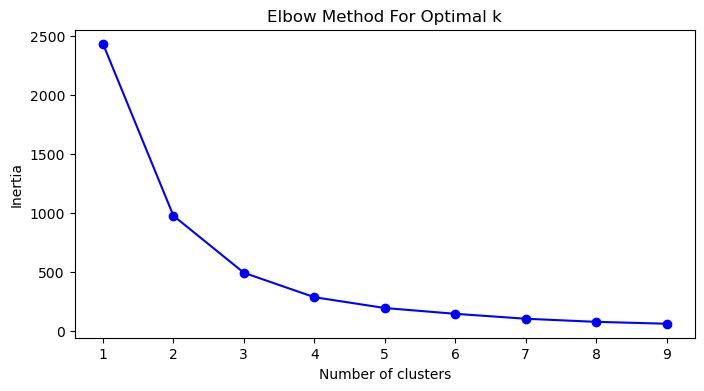

In [264]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(checkouts[features1])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
checkouts['cluster'] = kmeans.fit_predict(checkouts[features1])

In [265]:

cluster_summary = checkouts.groupby('cluster')['checkouts'].mean()
print("Cluster Summary:\n", cluster_summary)


for i in range(4):  
    cluster_stations = checkouts[checkouts['cluster'] == i]
    print(f"\nCluster {i} stations:\n", cluster_stations['station_id'].unique())

Cluster Summary:
 cluster
0    0.476070
1    6.028485
2    2.074859
3   -0.473612
Name: checkouts, dtype: float64

Cluster 0 stations:
 [  2   3   4   5   6   7  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  66  67  68  69  71  72  73  74  75  80  81  84  85  86  87  88  89
  90  92  93  94  96  97  98  99 100 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 123 125 126 127 128 129 130 131 134 137 138 140
 141 142 143 144 145 146 148 150 152 153 154 156 157 158 160 161 162 164
 165 166 168 172 173 175 176 177 180 181 182 183 186 188 190 191 194 196
 197 198 199 210 211 212 213 214 217 219 220 223 224 225 226 227 229 230
 231 232 233 234 236 237 238 239 240 241 242 243 244 245 247 249 253 254
 255 256 257 258 259 260 261 264 268 273 277 282 283 284 285 286 287 288
 289 291 293 294 295 296 298 299 300 301 302 303 304 305 306 

**Step 13**

Breakdown of net vehicle requirements by site

In [266]:
netcheck = quarterly_data.copy()
scaler = StandardScaler()
netcheck[features3] = scaler.fit_transform(netcheck[features3])

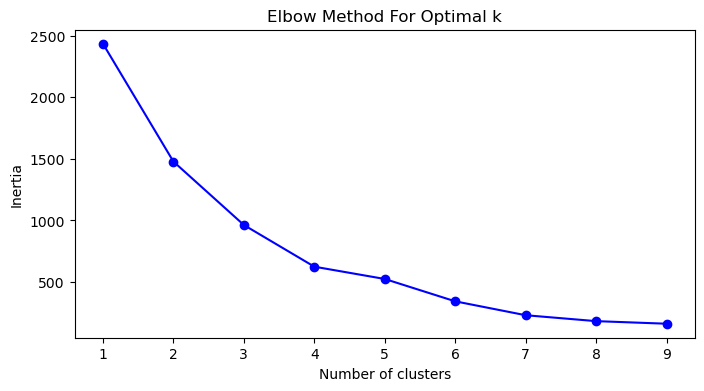

In [268]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(netcheck[features3])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
netcheck['cluster'] = kmeans.fit_predict(netcheck[features3])

In [271]:

cluster_summary = netcheck.groupby('cluster')['net_demand'].mean()
print("Cluster Summary:\n", cluster_summary)


for i in range(4):  
    cluster_stations = netcheck[netcheck['cluster'] == i]
    print(f"\nCluster {i} stations:\n", cluster_stations['station_id'].unique())

Cluster Summary:
 cluster
0    -0.088044
1     4.578123
2    -4.489222
3    12.147949
4     1.206976
Name: net_demand, dtype: float64

Cluster 0 stations:
 [  1   2   4   5   6   7   9  11  12  13  14  15  16  17  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59
  60  61  62  66  67  68  69  71  72  73  75  77  80  81  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145
 146 147 148 149 150 152 153 154 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 188 190 192 193 194 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 222 223 224 225
 226 227 228 229 230 231 232 233 234 236 

**Step 14**

Hierarchical cluster analysis of sites

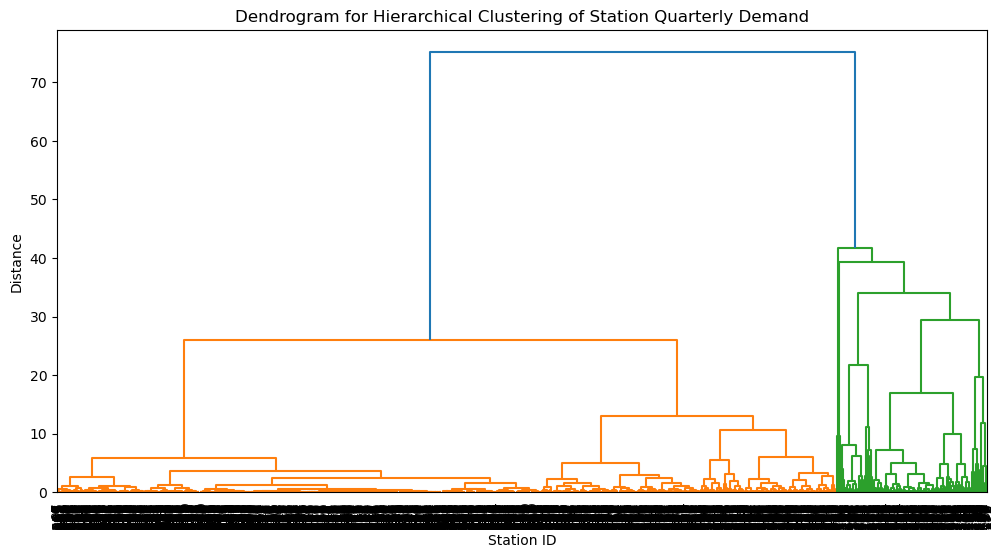

In [202]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 计算层次聚类的链接矩阵
Z = linkage(quarterly_data[features], method='ward')  # 使用 'ward' 方法计算链接矩阵

# 绘制树状图
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=quarterly_data['station_id'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering of Station Quarterly Demand")
plt.xlabel("Station ID")
plt.ylabel("Distance")
plt.show()

In [207]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 15
quarterly_data['cluster'] = fcluster(Z, distance_threshold, criterion='distance')

In [208]:
# View the average eigenvalues for each cluster
cluster_summary = quarterly_data.groupby('cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# View the sites contained in each cluster
for i in range(1, cluster_summary.shape[0] + 1):
    cluster_stations = quarterly_data[quarterly_data['cluster'] == i]
    print(f"\nCluster {i} stations:\n", cluster_stations['station_id'].unique())

Cluster Summary:
          station_id   quarter  checkouts   checkins  net_demand
cluster                                                        
1        426.661151  2.372734  -0.558026  -0.558829   -0.003967
2        255.774903  2.600259   0.031460   0.037841   -0.045191
3        147.000000  2.800000   6.677265   5.049562   11.783704
4        112.666667  2.666667   8.763969  10.376391  -11.405251
5        147.787879  2.712121   1.348784   1.110913    1.728558
6        136.444444  2.611111   3.570155   2.933703    4.624279
7        191.317073  2.762195   0.888634   0.939168   -0.346756
8        161.721649  2.711340   1.966299   2.031632   -0.434067
9        134.761905  2.904762   2.233557   2.739799   -3.589859
10       153.526316  2.894737   4.604430   4.672142   -0.405170

Cluster 1 stations:
 [  1   2   4   6   7   9  11  12  14  15  16  17  19  23  27  28  29  30
  32  34  42  45  46  55  62  86  88  92  95  97  99 101 102 103 108 109
 119 120 121 122 123 124 126 131 132 135 136 1